# Mathematische Beschreibung der Ionenkonzentrationen


## Struktur des Modells

### Variablen

#### Zeit $\:t$

#### Konzentrationen $\:c(t)$

* Innenseite der Plasmamembran $\:c_{int}(t)$
* Außenseite der Plasmamembran $\:c_{ext}(t)$

$\implies$ ..., welchen den Konzentrationsgradienten bilden: $$\varDelta c = c_{int} - c_{ext} $$
    
#### (Diffusions-) Geschwindigkeiten $\:v(\varDelta c,\:...)$

Dabei ist $v$ die Summe der Diffusionsraten aller modellierten Membrankomponenten, nämlich

* Atmungskette $\:v_{Atm}$
* ATP-Synthase $\:v_{ATP}$
* Untersuchter Kanal $\:v_{Kanal}$
* Hintergrundrate über den Rest der Membran $\:v_{Membran}$

$$\implies v \:= \sum_{i\, \in \, K} v_i \: = \: v_{Atm} + v_{ATP} + v_{Kanal} + v_{Membran} $$

wobei wir die Menge der Membrankomponenten $K\: = \:(Atm,\:ATP,\:Kanal,\:Membran)$ nennen und die Raten $v_i$ nach Innen gerichtet sind.

### Parameter

#### Volumina $\:V$

* In der Zelle $\:V_{int}$
* Außerhalb der Zelle $\:V_{ext}$

Dabei ist $V_{ext}$ nicht der gesamte extrazelluläre Raum, sondern vielmehr ein effektives Verteilungsvolumen $V_{ext,\, eff}$ in der Umgebung der Membran.

### Gleichungen

Die Grundidee ist, dass sich die Konzentrationen innen und außen mit Geschwindigkeit der Bewegung von Ionen über die Membran ändern, welche ihrerseits entsprechend dem Diffusionsgesetz vom Konzentrationgradienten abhängen.

Explizit gilt also für die Änderung der Konzentration in und außerhalb der Zelle mit der Zeit

$$\frac{\partial c_{int}}{\partial t} = \frac{v}{V_{int}} \qquad \mathrm{and} \qquad \frac{\partial c_{ext}}{\partial t} = - \frac{v}{V_{ext}}$$


Für die Implementierung führen wir hier die "Ortskoordinate" $x$ ein, welche die diskreten Werte $0$ oder $1$ beziehungsweise $innen$ und $außen$ annehmen. Somit können Konzentration $c$, Volumen $V$, ... im Code als $c[0]$, $V[0]$, ... verwendet werden.

# Implementierung

In [12]:
import numpy as np
from scipy.integrate import odeint

## Parameter

In [123]:
# Membrankomponenten
K = ['Atm', 'ATP', 'Kanal', 'Membran']

# Innen- und Außenvolumen
V = [4, 6]

# Proportionalität der Diffusionsraten v_i
alpha = {'Atm':0.8, 'ATP':1, 'Kanal':1, 'Membran':1}

## Funktionen

In [141]:
# Verhalten der Membrankomponenten
def v_Atm(c):
    gradientc = c[1] - c[0]
    return alpha['Atm'] * gradientc

def v_ATP(c):
    gradientc = c[1] - c[0]
    return alpha['ATP'] * gradientc

def v_Kanal(c):
    gradientc = c[1] - c[0]
    return alpha['Kanal'] * gradientc

def v_Membran(c):
    gradientc = c[1] - c[0]
    return alpha['Membran'] * gradientc

# Berechnen der Gesamtrate
def v(c):
    return np.sum(v_Atm(c), v_ATP(c), v_Kanal(c), v_Membran(c))

# Berechnung der Konzentrationsänderung
def cpunkt(c, t):
    dcdt = [v(c)/V[0], -v(c)/V[1]]
    return dcdt

## Integration

### Anfangsbedingungen und Genauigkeit

In [30]:
# Anfangskonzentration
c_0 = [1, 10]

# Zeitraum und Integrationsschritte
schritte = 300
zeit = 10

### Lösung mit scipy.integrate.odeint

In [31]:
t = np.linspace(0, zeit, schritte)
loesung = odeint(cpunkt, c_0, t, args=())

## Visualisierung

In [105]:
import matplotlib.pyplot as pyplt
import os

### Zeit-Konzentrations-Diagramm

/home/phaetjay/.local/share/virtualenvs/lsl/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


NameError: name 'os' is not defined

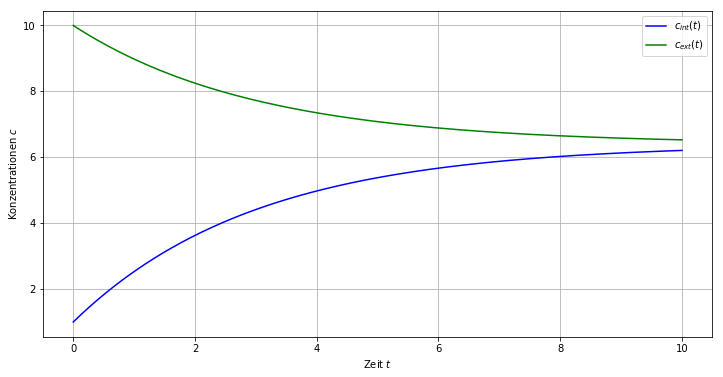

In [122]:
#%matplotlib inline
tc, tcax = pyplt.subplots(figsize=(12, 6))
tcax.plot(t, loesung[:, 0], 'b', label='$c_{int}(t)$')
tcax.plot(t, loesung[:, 1], 'g', label='$c_{ext}(t)$')
tcax.legend(loc='best')
tcax.set_xlabel('Zeit $t$')
tcax.set_ylabel('Konzentrationen $c$')
tcax.grid()
tc.show()
if not os.path.exists('./figures'):
    os.mkdir('./figures')
tc.savefig('./figures/time-conc-diagram.png')

### Räumliche Animation

In [35]:
# Zum Animieren in diesem notebook
from matplotlib import animation
from matplotlib.animation import FuncAnimation

# Array für Bild definieren
height = 400
width = 400

# half-height
hh = int(height/2)
# maximum concentration
maxconc = max([max([loesung[x][0] for x in range(0,len(loesung))]), 
               max([loesung[x][1] for x in range(0,len(loesung))])])

# Array mit Wert 0 initialisieren
image = np.zeros((height, width))
frame = image

<IPython.core.display.Javascript object>


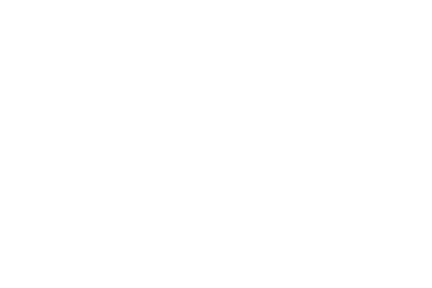

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [103]:
#%matplotlib notebook

# Figure und Animation
anim, animax = plt.subplots(111)

# Membran einzeichnen
quer, mem1, mem2 = [0, width], [-5, -5], [+5, +5]
animax.plot(quer, mem1, quer, mem2, color='green', lw=3, marker = None)

im = plt.imshow(image, interpolation='none', cmap='Blues', vmin=0, vmax=2,
              aspect='auto', extent=[0,width,-hh,hh])
plt.title('Konzentrationsgradient zur Zeit $t = 0.000\,s$')

# Labels verstecken bzw. umbeschriften
#anim.xticks([])
#labels = im.get_xticks().tolist()
#labels[0] = 'Plasmamembran'
#anim.set_xticklabels(labels)

    
# Initialisierungsfunktion: Plottet für jeden Frame den Hintergrund
def init():
    return [image]

# Animationsfunktion: Wird sequenziell vom Animator aufgerufen
def animate(i):
    frame[0 : hh-5, 0 : width] = loesung[i][1]/maxconc*1.5+0.5
    frame[hh+5 : height, 0 : width] = loesung[i][0]/maxconc*1.5+0.5
    plt.title('Konzentrationsgradient zur Zeit $t = ' + '{: 0.3f}'.format(t[i]) + '\,s$')
    im.set_array(frame)
    return [im]

# Animator aufrufen
# blit=True damit nur veränderte Pixel neu gesetzt werden
anima = animation.FuncAnimation(anim, animate, init_func=init, frames=schritte, 
                               interval=int(zeit/schritte*1000), blit=True)

# animation als *.mp4 speichern
#anima.save('./figures/animation_mem_conc.mp4', fps=30, 
#           extra_args=['-vcodec', 'libx264'])

# animation als *.gif speichern
# Unter Windows muss dafür evtl. ImageMagick installiert
# und der convert_path definiert werden, um *.gif s zu speichern
#plt.rcParams['animation.convert_path'] = '<path-to>/magick.exe'

writer = animation.ImageMagickFileWriter()
writer.fps = 30
#anima.save('./figures/animation_mem_conc.gif', writer=writer)

Animationen funktionieren nur beim Ausführen im Jupyter Notebook oder direkt als Python Code, nicht auf Github und nicht im PDF. Die Animation wird aber auch als \*.mp4 und als \*.gif gespeichert. Dazu die jeweilige Zeile auskommentieren.